In [14]:
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from scheduler import NoiseScheduler
from utils.sinusoidal_embeddings import get_sinusoidal_embeddings
from tqdm import tqdm

# Get data

In [26]:
 batch_size = 32
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
# testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
# testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)


# Noise Scheduler

In [17]:
from model.unet import Unet

unet = Unet()

out_final = unet(test_time_t, t)


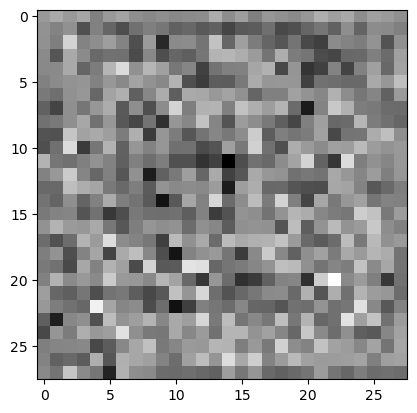

In [18]:
plt.imshow(out_final[0][0].squeeze().detach().numpy(), cmap='gray')

In [27]:
epochs = 10
optimizer= torch.optim.Adam(unet.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()
noise_scheduler = NoiseScheduler(1000, 0.0001, 0.02)
device= 'cuda' if torch.cuda.is_available() else 'cpu'

In [31]:
def train(trainloader):
    for epoch in range(epochs):
    
        for i, data in enumerate(tqdm(trainloader)):
            optimizer.zero_grad()
            inputs= data
            inputs= inputs.float().to(device)
            #sample random noise
            inputs_noise = torch.randn_like(inputs).to(device)
            #sample timestep
            t = torch.randint(0, 1000, (inputs.shape[0],)).to(device)

            #adding noise to inputs
            noisy_inputs = noise_scheduler.add_noise(inputs, inputs_noise, t)
            #forward pass
            outputs = unet(noisy_inputs, t)
            loss = criterion(outputs, inputs_noise)
            loss.backward()
            optimizer.step()

            print(f'Epoch: {epoch}, Batch: {i}, Loss: {loss.item()}')


In [29]:
from dataset.mnist_dataset import MnistDataset

In [24]:
trainloader = MnistDataset(root_dir='./dataset/data')

Found 60000 images


In [33]:
train_loader = DataLoader(trainloader, batch_size=batch_size, shuffle=True, num_workers=2)

In [32]:
train(train_loader)

  0%|          | 0/1875 [00:00<?, ?it/s]

torch.Size([32, 1, 28, 28])


  0%|          | 1/1875 [00:12<6:30:24, 12.50s/it]

Epoch: 0, Batch: 0, Loss: 1.0616734027862549
torch.Size([32, 1, 28, 28])


  0%|          | 2/1875 [00:21<5:29:54, 10.57s/it]

Epoch: 0, Batch: 1, Loss: 1.0159798860549927
torch.Size([32, 1, 28, 28])


  0%|          | 3/1875 [00:30<5:05:45,  9.80s/it]

Epoch: 0, Batch: 2, Loss: 0.9566057324409485
torch.Size([32, 1, 28, 28])


  0%|          | 4/1875 [00:39<4:48:53,  9.26s/it]

Epoch: 0, Batch: 3, Loss: 0.9325096607208252
torch.Size([32, 1, 28, 28])


  0%|          | 5/1875 [00:47<4:43:18,  9.09s/it]

Epoch: 0, Batch: 4, Loss: 0.8953241109848022
torch.Size([32, 1, 28, 28])


  0%|          | 6/1875 [00:56<4:35:06,  8.83s/it]

Epoch: 0, Batch: 5, Loss: 0.8609833121299744
torch.Size([32, 1, 28, 28])


  0%|          | 7/1875 [01:04<4:33:36,  8.79s/it]

Epoch: 0, Batch: 6, Loss: 0.8471986651420593
torch.Size([32, 1, 28, 28])


  0%|          | 8/1875 [01:12<4:26:38,  8.57s/it]

Epoch: 0, Batch: 7, Loss: 0.8330579400062561
torch.Size([32, 1, 28, 28])
